## Observations and Insights 

In [1]:
%matplotlib notebook

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID", how='outer')
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice in the DataFrame.
len(mouse_study_df["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study_df.loc[mouse_study_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = mouse_study_df.loc[mouse_study_df["Mouse ID"] == 'g989']
duplicate_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mouse_study_df[mouse_study_df["Mouse ID"].isin(duplicate_mice) == False]
clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
number_mice_df = len(clean_mouse_df["Mouse ID"].unique())
number_mice_df

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_tumor = clean_mouse_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median_tumor = clean_mouse_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance_tumor = clean_mouse_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
std_tumor = clean_mouse_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sem_tumor = clean_mouse_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

summary_tumor_df = pd.DataFrame({"Mean Tumor Volume": mean_tumor,
                                 "Median Tumor Volume": median_tumor,
                                 "Variance Tumor Volume": variance_tumor,
                                 "Standard Deviation Tumor Volume": std_tumor,
                                 "Standard Error Mean Tumor Volume": sem_tumor})
summary_tumor_df

# This method is the most straightforward, creating multiple series and putting them all together at the end.

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,Standard Error Mean Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_clean = clean_mouse_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
summary_clean

# This method produces everything in a single groupby function.

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

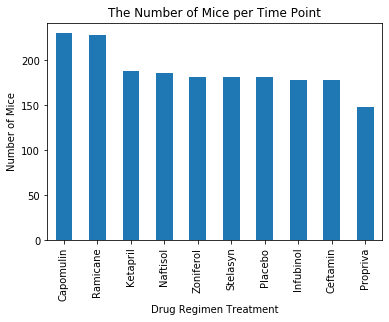

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
mice_time = clean_mouse_df["Drug Regimen"].value_counts()
mice_time.plot(kind="bar")
plt.title("The Number of Mice per Time Point")
plt.xlabel("Drug Regimen Treatment")
plt.ylabel("Number of Mice")
plt.show()

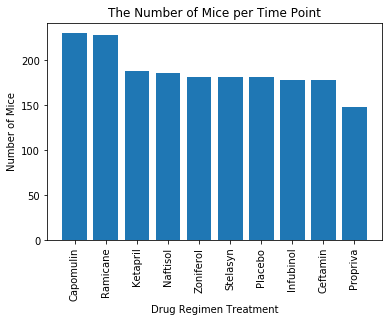

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
x_axis = mice_time.index.values
y_axis = mice_time.values
plt.bar(x_axis, y_axis)
plt.xticks(rotation=90)
plt.title("The Number of Mice per Time Point")
plt.xlabel("Drug Regimen Treatment")
plt.ylabel("Number of Mice")
plt.show()

## Pie Plots

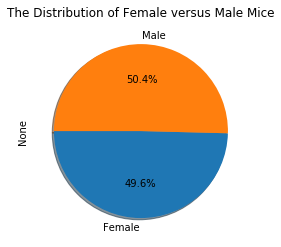

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
group_gender_df = pd.crosstab(clean_mouse_df["Mouse ID"],clean_mouse_df["Sex"]).apply(lambda r: r/r.sum(), axis=1)
mice_gender_pd = group_gender_df.sum()
mice_gender_pd
gender = ["Female", "Male"]
mice_gender_pd.plot(kind="pie", labels=gender, autopct="%1.1f%%", shadow=True, startangle=180)
plt.title("The Distribution of Female versus Male Mice")
plt.show()

# group_gender_df = clean_mouse_df.groupby(["Mouse ID","Sex"])
# group_gender_df
# mice_gender = pd.DataFrame(group_gender_df.groupby(["Sex"]).count())
# mice_gender.columns = ["Count"]

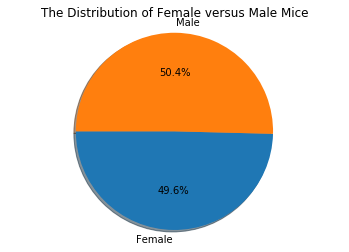

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
group_gender_df = pd.crosstab(clean_mouse_df["Mouse ID"],clean_mouse_df["Sex"]).apply(lambda r: r/r.sum(), axis=1)
mice_gender_pd = group_gender_df.sum()
mice_gender_pd
plt.pie(mice_gender_pd, labels=gender, autopct="%1.1f%%", shadow=True, startangle=180)
plt.axis("equal")
plt.title("The Distribution of Female versus Male Mice")
plt.show()

# group_gender = clean_mouse_df.groupby(["Mouse ID","Sex"])
# group_gender
# mice_gender_df = pd.DataFrame(group_gender.size())
# mice_gender = pd.DataFrame(group_gender_df.groupby(["Sex"]).count())

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
capomulin_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Capomulin"]
capomulin_last = capomulin_df.groupby('Mouse ID').max()['Timepoint']
capomulin_tumor = pd.DataFrame(capomulin_last) 
capomulin_merge = pd.merge(capomulin_tumor, clean_mouse_df, on=("Mouse ID", "Timepoint"),how="left")
capomulin_merge

final_tumor_volume1 = capomulin_merge["Tumor Volume (mm3)"]

quartiles = final_tumor_volume1.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of final tumor volume is: {lowerq}")
print(f"The upper quartile of final tumor volume is: {upperq}")
print(f"The interquartile range of final tumor volume is: {iqr}")
print(f"The the median of final tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

final_tumor_volume_1_df = capomulin_merge.loc[(capomulin_merge['Tumor Volume (mm3)'] < lower_bound) | (capomulin_merge['Tumor Volume (mm3)'] > upper_bound)]
final_tumor_volume_1_df

print(final_tumor_volume_1_df)

The lower quartile of final tumor volume is: 32.37735684
The upper quartile of final tumor volume is: 40.1592203
The interquartile range of final tumor volume is: 7.781863460000004
The the median of final tumor volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Empty DataFrame
Columns: [Mouse ID, Timepoint, Drug Regimen, Sex, Age_months, Weight (g), Tumor Volume (mm3), Metastatic Sites]
Index: []


In [14]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
ceftamin_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Ceftamin"]
ceftamin_last = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_tumor = pd.DataFrame(ceftamin_last)
ceftamin_merge = pd.merge(ceftamin_tumor, clean_mouse_df, on=("Mouse ID", "Timepoint"),how="left")
ceftamin_merge

final_tumor_volume2 = ceftamin_merge["Tumor Volume (mm3)"]

quartiles = final_tumor_volume2.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of final tumor volume is: {lowerq}")
print(f"The upper quartile of final tumor volume is: {upperq}")
print(f"The interquartile range of final tumor volume is: {iqr}")
print(f"The the median of final tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

final_tumor_volume_2 = ceftamin_merge.loc[(ceftamin_merge['Tumor Volume (mm3)'] < lower_bound) | (ceftamin_merge['Tumor Volume (mm3)'] > upper_bound)]
final_tumor_volume_2

print(final_tumor_volume_2)

The lower quartile of final tumor volume is: 48.72207785
The upper quartile of final tumor volume is: 64.29983003
The interquartile range of final tumor volume is: 15.577752179999997
The the median of final tumor volume is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
Empty DataFrame
Columns: [Mouse ID, Timepoint, Drug Regimen, Sex, Age_months, Weight (g), Tumor Volume (mm3), Metastatic Sites]
Index: []


In [15]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
infubinol_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Infubinol"]
infubinol_last = infubinol_df.groupby('Mouse ID').max()['Timepoint']
infubinol_tumor = pd.DataFrame(infubinol_last)
infubinol_merge = pd.merge(infubinol_tumor, clean_mouse_df, on=("Mouse ID", "Timepoint"),how="left")
infubinol_merge

final_tumor_volume3 = infubinol_merge["Tumor Volume (mm3)"]

quartiles = final_tumor_volume3.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of final tumor volume is: {lowerq}")
print(f"The upper quartile of final tumor volume is: {upperq}")
print(f"The interquartile range of final tumor volume is: {iqr}")
print(f"The the median of final tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

final_tumor_volume_3 = infubinol_merge.loc[(infubinol_merge['Tumor Volume (mm3)'] < lower_bound) | (infubinol_merge['Tumor Volume (mm3)'] > upper_bound)]
final_tumor_volume_3


print(final_tumor_volume_3)

The lower quartile of final tumor volume is: 54.04860769
The upper quartile of final tumor volume is: 65.52574285
The interquartile range of final tumor volume is: 11.477135160000003
The the median of final tumor volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
  Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
5     c326          5    Infubinol  Female          18          25   

   Tumor Volume (mm3)  Metastatic Sites  
5           36.321346                 0  


In [16]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
ramicane_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Ramicane"]
ramicane_last = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ramicane_tumor = pd.DataFrame(ramicane_last)
ramicane_merge = pd.merge(ramicane_tumor, clean_mouse_df, on=("Mouse ID", "Timepoint"),how="left")
ramicane_merge

final_tumor_volume4 = ramicane_merge["Tumor Volume (mm3)"]

quartiles = final_tumor_volume4.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of final tumor volume is: {lowerq}")
print(f"The upper quartile of final tumor volume is: {upperq}")
print(f"The interquartile range of final tumor volume is: {iqr}")
print(f"The the median of final tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

final_tumor_volume_4 = ramicane_merge.loc[(ramicane_merge['Tumor Volume (mm3)'] < lower_bound) | (ramicane_merge['Tumor Volume (mm3)'] > upper_bound)]
final_tumor_volume_4

print(final_tumor_volume_4)

The lower quartile of final tumor volume is: 31.56046955
The upper quartile of final tumor volume is: 40.65900627
The interquartile range of final tumor volume is: 9.098536719999998
The the median of final tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Empty DataFrame
Columns: [Mouse ID, Timepoint, Drug Regimen, Sex, Age_months, Weight (g), Tumor Volume (mm3), Metastatic Sites]
Index: []


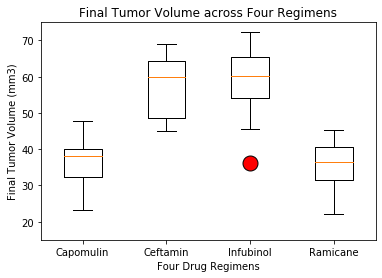

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumors = [final_tumor_volume1, final_tumor_volume2, final_tumor_volume3, final_tumor_volume4]
fig1, ax1 = plt.subplots()
redmark = dict(markerfacecolor="red", markersize=15)
ax1.set_title('Final Tumor Volume across Four Regimens')
ax1.set_xlabel('Four Drug Regimens')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumors, labels=["Capomulin", "Ceftamin", "Infubinol", "Ramicane"], flierprops=redmark)
plt.ylim(15,75)
plt.show()

## Line and Scatter Plots

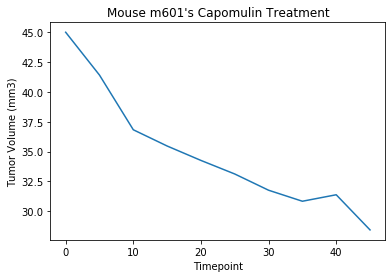

In [18]:
capomulin_table = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] =="Capomulin"]
mouse_cap_df = capomulin_table.loc[capomulin_table["Mouse ID"]=="m601"]
mouse_cap_df
x_axis = mouse_cap_df["Timepoint"]
y_axis = mouse_cap_df["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)
plt.title("Mouse m601's Capomulin Treatment")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

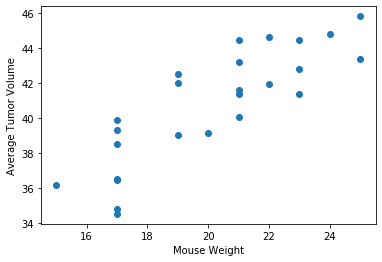

In [19]:
# Generate a scattter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_avg_tumor_volume = capomulin_table.groupby(["Mouse ID"]).mean()
plt.scatter(cap_avg_tumor_volume["Weight (g)"],cap_avg_tumor_volume["Tumor Volume (mm3)"])
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()

## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(cap_avg_tumor_volume["Weight (g)"],cap_avg_tumor_volume["Tumor Volume (mm3)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


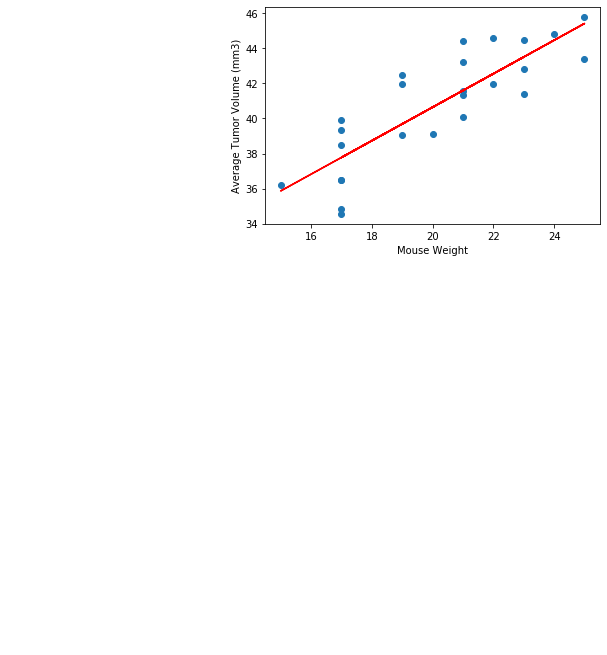

In [21]:
x_values = cap_avg_tumor_volume["Weight (g)"]
y_values = cap_avg_tumor_volume["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()